In [97]:
import os.path
import matplotlib.pyplot as plt
import pickle
import numpy as np
import re
import glob
import json

%matplotlib inline

exp_root = "res"
params_file = 'params.json'
episode_len_file = 'episode_len.p'
load_json = lambda filename: json.load(open(filename, "r"))
load_len = lambda filename: pickle.load(open(filename, "r"))


re_alpha= re.compile('.+alpha-(\d\.\d)')
re_algo = re.compile('.+alg\-([a-z]+)\_$')

def moving_average(data, step):
    N = len(data) - step
    res = np.zeros(N)
    for i in range(N):
        res[i] = np.mean(data[i:i+step])
    return res

def mean_pooling(data, window_size):
    N = data.shape[0] // window_size + 1
    res = np.zeros(N)
    for i in range(N):
        res[i] = np.mean(data[window_size*i:window_size*(i+1)])
    return res

def compute_title_and_labels(experiments):
    """
    find all the different properties (except filenames): they will be labels
    title is all the properties that are shared
    """
    dont_show = ["filename", "total_iter"]
    shared = set.intersection(*[set(e.items()) for e in experiments])
    title = ""
    shared_keys = [k for k, _ in shared]
    for k, v in shared:
        title += k + ":" + str(v) + ","
    title = title.rstrip(",")
    
    labels = []
    for e in experiments:
        label = ""
        for k, v in e.iteritems():
            if k not in shared_keys + dont_show:
                label += k + ":" + str(v) + ","
        label.rstrip(",")
        labels.append(label)
    
    return title, labels

def compare(constraints, exp_dir):
    """
    constraints: dict of constraints
    """
    list_exps = glob.glob(exp_dir + "/*")
    print "found", len(list_exps), "directories"
    plt.figure(figsize=(30,30))
    episode_lengths=[]
    runs = []
    for exp in list_exps:
        params_filename = exp + '/' + params_file
        lens_filename = exp + '/' + episode_len_file

        if os.path.isfile(params_filename):
            run = load_json(params_filename)
            if not all([run[k] == v for k, v in constraints.iteritems()]):
                continue
            for k, v in run.iteritems():
                if type(v) == dict:
                    run[k] = str(v)
                    
            runs.append(run)
            print run
            episode_lengths.append(load_len(lens_filename))
            
    title, labels = compute_title_and_labels(runs)

    for run, ep_len, label in zip(runs, episode_lengths, labels):
            plt.plot(mean_pooling(ep_len.flatten(),1000), label=label)
            print ep_len.mean()
    plt.legend(fontsize=28)        
    plt.title(title)
    plt.show()



Partial observability:
found 31 directories
{u'reward_map': "{u'1': 1, u'0': 0}", u'obs_map': "{u'1': -0.5, u'0': -1.0, u'3': 0.5, u'2': 0.0, u'4': 1.0}", u'n_landmarks': 2, u'experience_memory': 1000, u'freq_train': 1000, u'n_agents': 1, u'n_iter_per_train': 20, u'algo': u'rpg', u'bs': 256, u'lr': 0.0003, u'observability': u'partial', u'n_hidden': 12, u'gamma': 0.99, u'max_episode_len': 50}
{u'reward_map': "{u'1': 1, u'0': 0}", u'obs_map': "{u'1': -0.5, u'0': -1.0, u'3': 0.5, u'2': 0.0, u'4': 1.0}", u'n_landmarks': 2, u'experience_memory': 1000, u'freq_train': 1000, u'n_agents': 1, u'n_iter_per_train': 20, u'algo': u'rpg_baseline_rec', u'bs': 256, u'lr': 0.001, u'observability': u'partial', u'n_hidden': 12, u'gamma': 0.99, u'max_episode_len': 50}
{u'reward_map': "{u'1': 1, u'0': 0}", u'obs_map': "{u'1': -0.5, u'0': -1.0, u'3': 0.5, u'2': 0.0, u'4': 1.0}", u'n_landmarks': 2, u'experience_memory': 20000, u'freq_train': 1000, u'n_agents': 1, u'n_iter_per_train': 20, u'algo': u'rpg_baseli

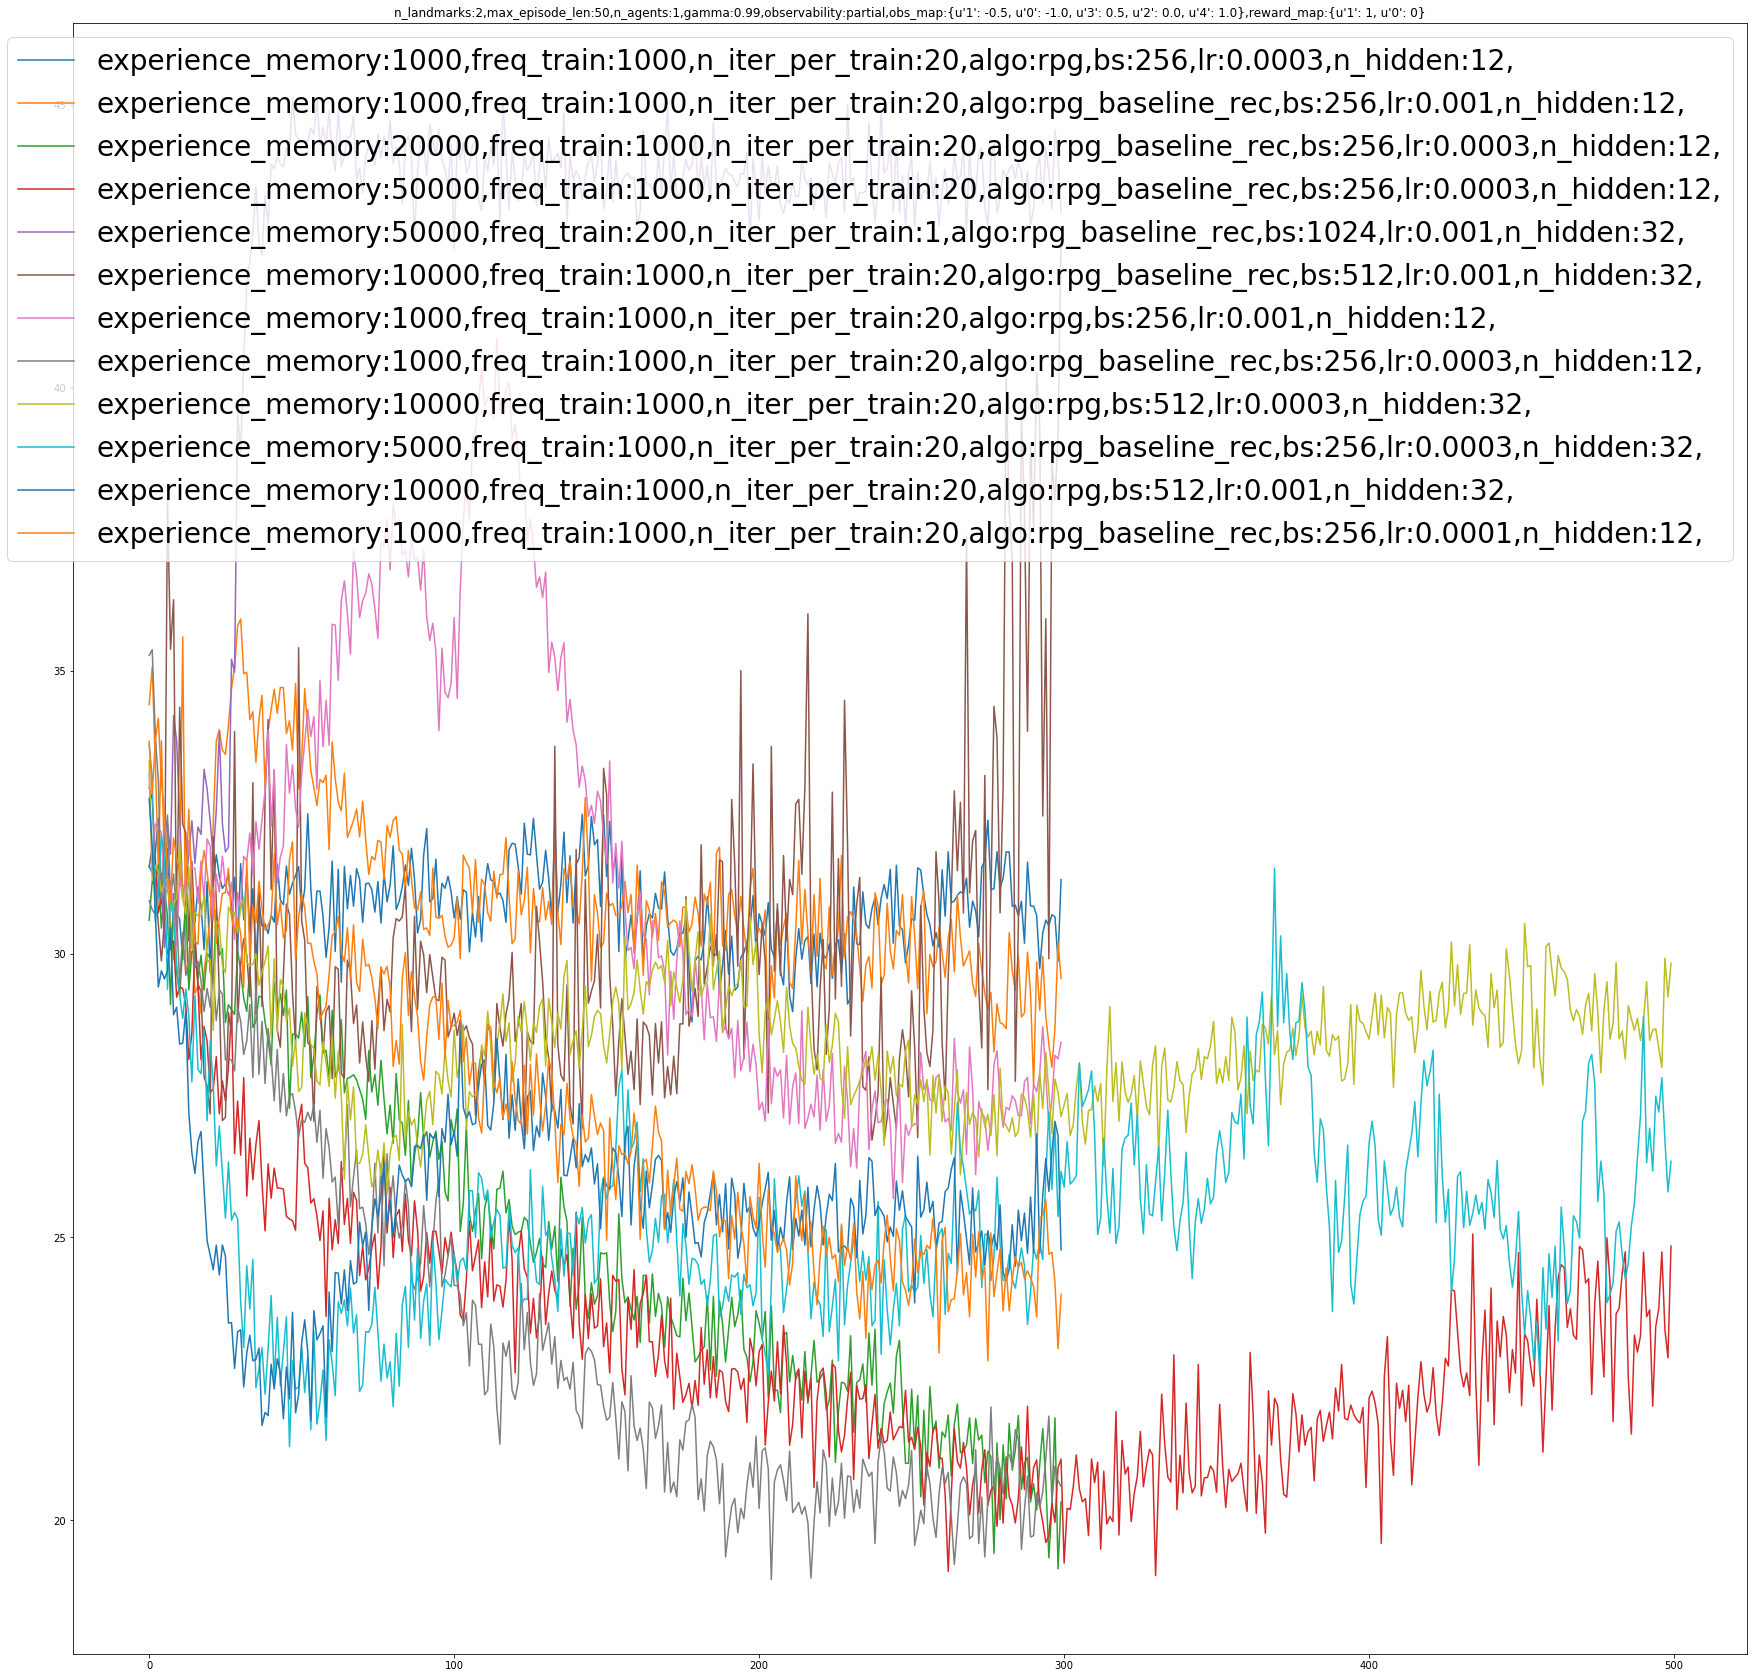

Full observability:
found 31 directories
{u'reward_map': "{u'1': 1, u'0': 0}", u'obs_map': "{u'1': -0.5, u'0': -1.0, u'3': 0.5, u'2': 0.0, u'4': 1.0}", u'n_landmarks': 2, u'experience_memory': 50000, u'freq_train': 1000, u'n_agents': 1, u'n_iter_per_train': 20, u'algo': u'rpg_baseline_rec', u'bs': 128, u'lr': 0.0003, u'observability': u'full', u'n_hidden': 12, u'gamma': 0.99, u'max_episode_len': 25}
{u'reward_map': "{u'1': 1, u'0': 0}", u'obs_map': "{u'1': -0.5, u'0': -1.0, u'3': 0.5, u'2': 0.0, u'4': 1.0}", u'n_landmarks': 2, u'experience_memory': 50000, u'freq_train': 250, u'n_agents': 1, u'n_iter_per_train': 5, u'algo': u'rpg_baseline_rec', u'bs': 32, u'lr': 0.0003, u'observability': u'full', u'n_hidden': 12, u'gamma': 0.99, u'max_episode_len': 50}
{u'reward_map': "{u'1': 1, u'0': 0}", u'obs_map': "{u'1': -0.5, u'0': -1.0, u'3': 0.5, u'2': 0.0, u'4': 1.0}", u'n_landmarks': 2, u'experience_memory': 50000, u'freq_train': 1000, u'n_agents': 1, u'n_iter_per_train': 20, u'algo': u'rpg_ba

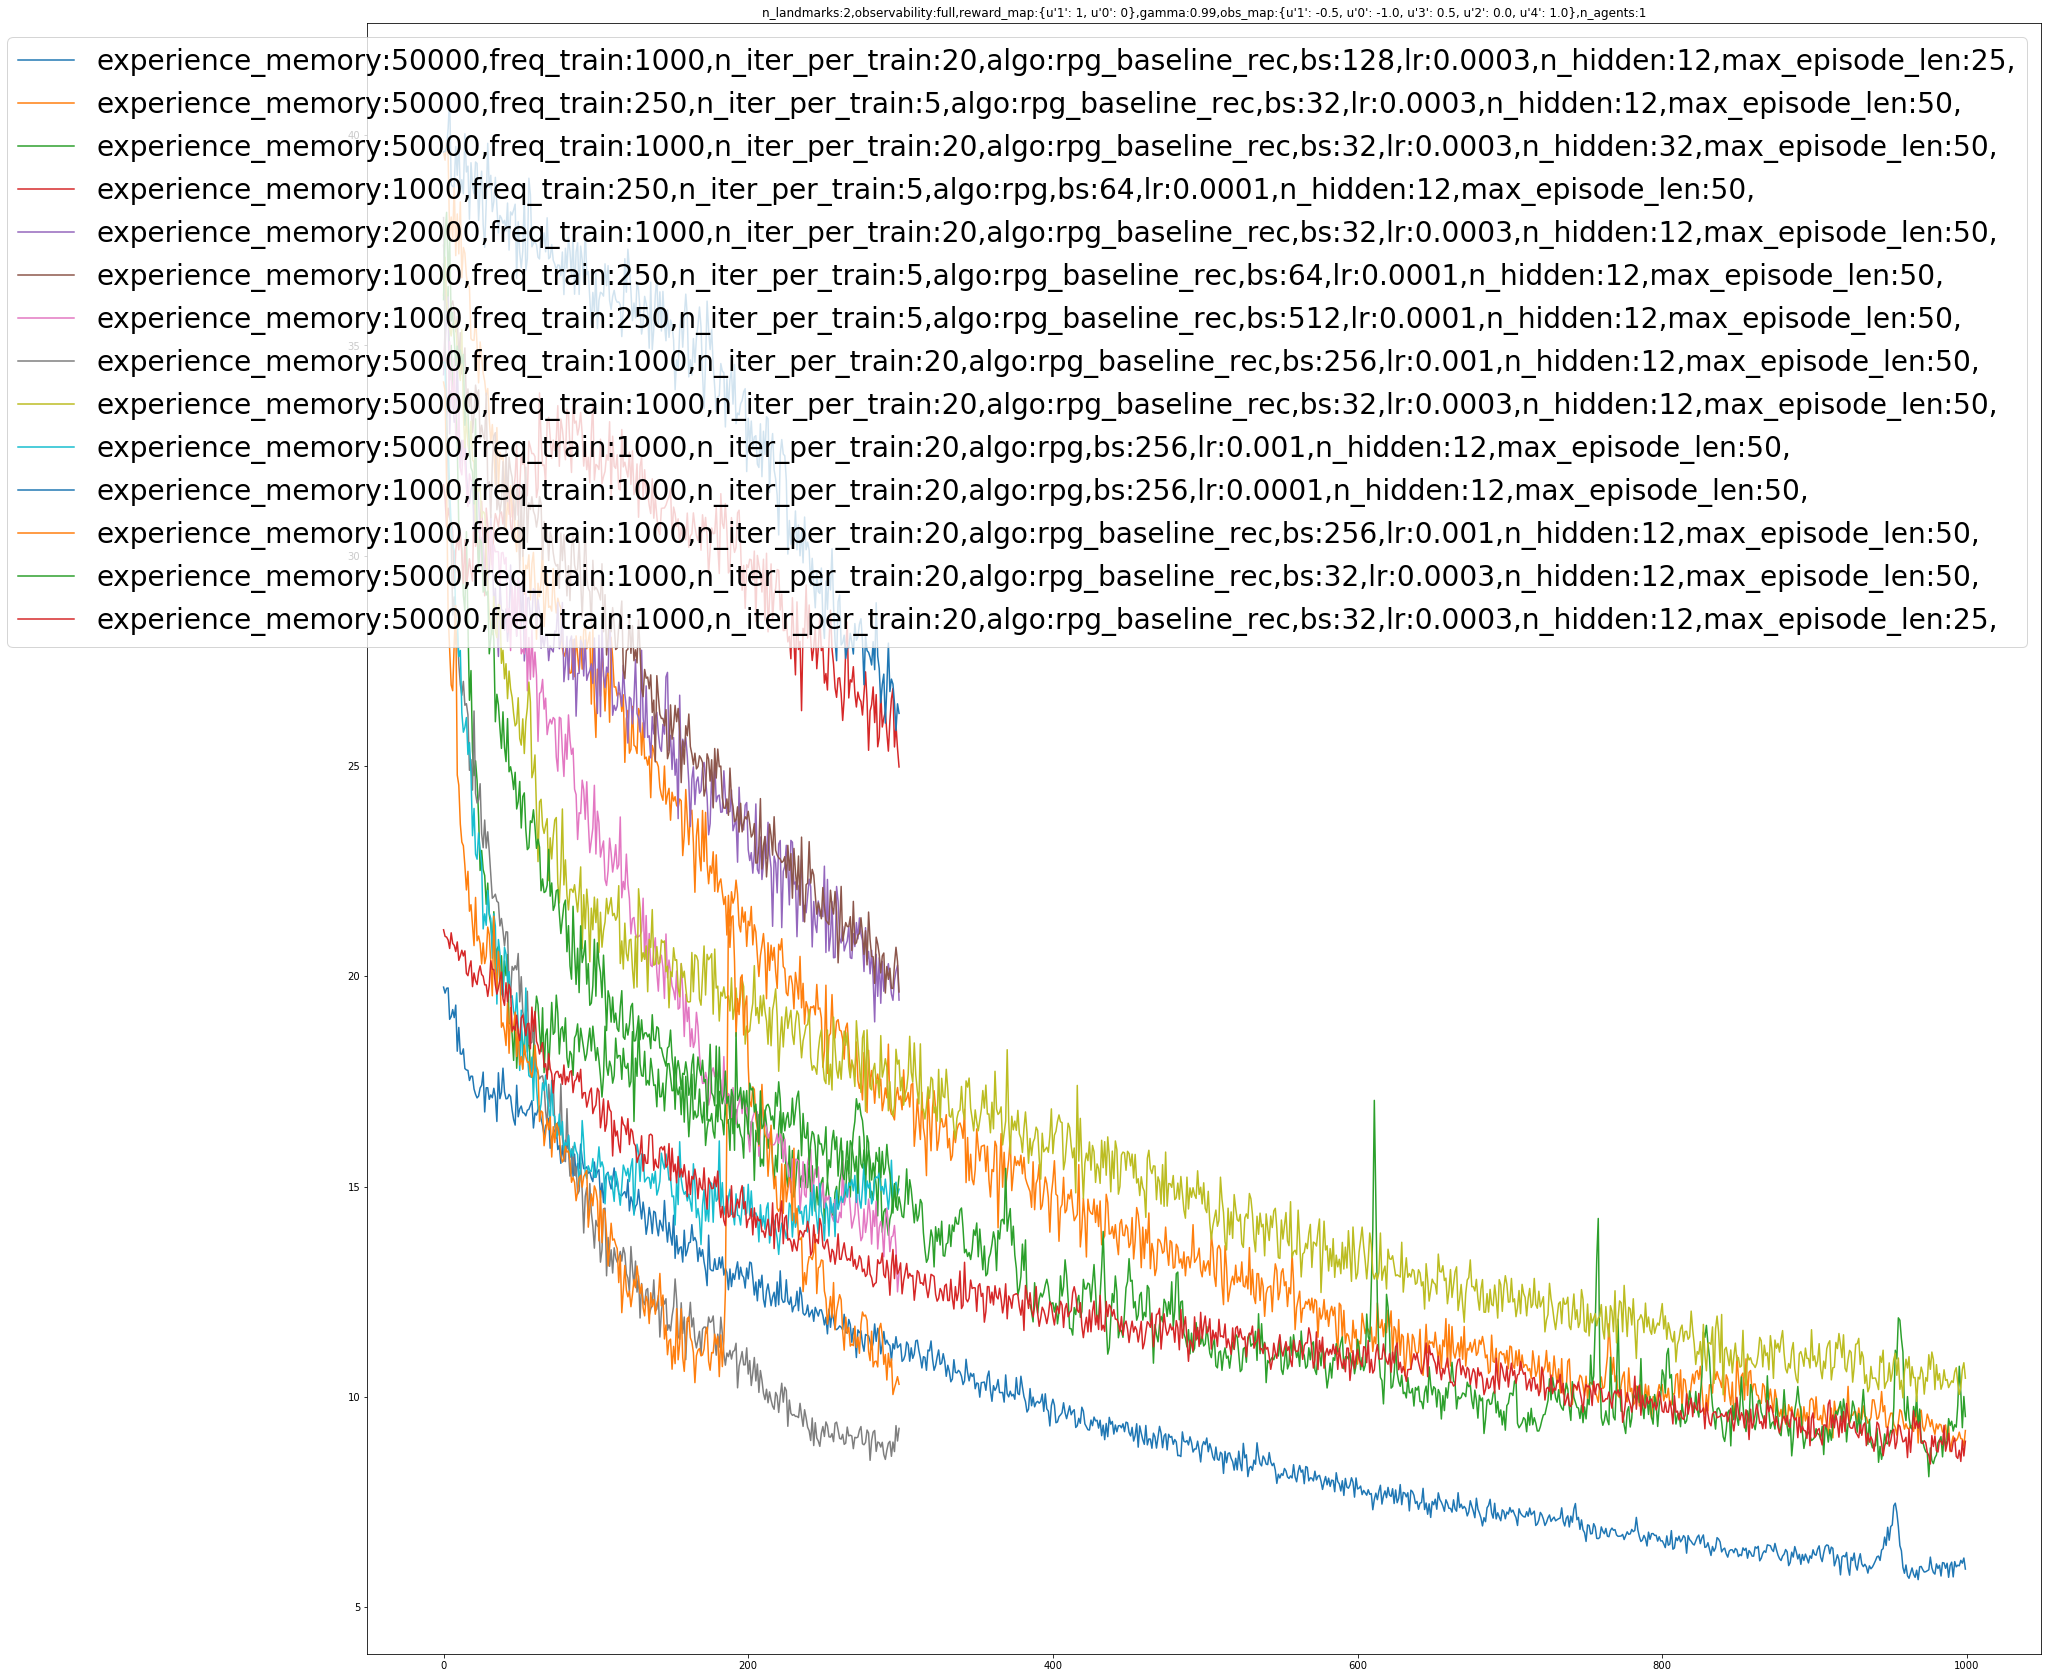

In [98]:
print "Partial observability:"
compare({"observability": "partial"}, exp_root)
print "Full observability:"
compare({"observability": "full"}, exp_root)
#compare({"n_landmarks":2}, exp_root)

